# Competency Based Curriculum Chatbot Project 

## Overview

This project involved building a chatbot to  automate responses for the new education system in Kenya (CBC), assisting  students, parents, and educators with curriculum details, assessments, and policies. It enhances engagement, provides instant information, and simplifies learning pathways using AI-driven conversational support tailored to user needs.

## Business Understanding

The Competency-Based Curriculum (CBC) in Kenya is designed to equip learners with practical skills, but its implementation has faced challenges. Parents, teachers, and students often struggle to access accurate and timely information regarding the curriculum, assessment methods, and their respective roles. Currently, most CBC-related inquiries rely on government circulars, school meetings, or online discussions, which are often fragmented and inconsistent.

To address this, an AI-powered chatbot will be developed to provide instant, reliable, and structured responses to CBC-related questions. This chatbot will serve as an interactive platform where users can seek information about curriculum structure, assessment criteria, parental involvement, and available teaching resources. The goal is to enhance accessibility, reduce misinformation, and improve user engagement by leveraging natural language processing (NLP) for dynamic, intelligent responses.

## Data Understanding
To ensure the chatbot delivers relevant and accurate responses, data will be gathered from multiple sources. Official curriculum documents from the Kenya Institute of Curriculum Development (KICD) will serve as the primary data source, supplemented by Ministry of Education policies, circulars, and guidelines. 
The data will primarily be text-based, comprising structured content from official documents and unstructured conversations from forums and user queries. 

## Objectives
1. To develop a chatbot that leverages TF-IDF and Cosine Similarity to match user queries with relevant responses, while utilizing Random Forest/XGBoost to rank and optimize the best possible answers, ensuring accurate and efficient query resolution

2. To analyze the question column in the FAQS dataset to identify the most frequently asked queries and common keywords, enabling optimization of chatbot responses and improving user query resolution.

3. To develop an NLP model to classify CBC tweets as positive, negative, or neutral, providing actionable insights into improved education system.

4. To analyze sentiment trends in tweets about the CBC education system, providing actionable insights to support strategic decision-making for policy development, curriculum improvements, and stakeholder engagement 

5.  the bot to bilingual/ also able to translate English to Swahili in case someone types in Swahili


In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the FAQS dataset
data = pd.read_csv("FAQS.csv")
data.head()

,Question,Answer
0,What are the main objectives of the Competency...,The CBC aims to equip learners with practical ...
1,How does CBC differ from the 8-4-4 education s...,"Unlike 8-4-4, which focused on exams and conte..."
2,What are the key levels in the CBC structure?,CBC is divided into three main levels: Early Y...
3,What role do parents play in CBC?,Parents are actively involved in their child's...
4,How is learner progress assessed under CBC?,Assessment is continuous and includes practica...


In [3]:
# Loading the tweets dataset
tweets = pd.read_csv("merged_dataset_Twitter.csv")
tweets.head(10)

,Tweet_count,Username,Text,Created At,Retweets,Likes
0,1,Edtech East Africa,"Let’s Talk Monday: EdTech Edition!\nParents, d...",Mon Jan 20 07:20:46 +0000 2025,1,3
1,2,Edtech East Africa,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,Mon Jan 27 08:45:00 +0000 2025,1,0
2,3,unknown,Education reforms under CBC are revolutionizin...,Mon Jan 20 09:16:39 +0000 2025,0,0
3,4,Kenya Girl Guides Association,Betty Kirui shares how the CBC education syste...,Mon Dec 16 07:32:44 +0000 2024,1,2
4,5,His/Him/He,The shift from 8-4-4 to CBC reflects Kenya's c...,Mon Jan 20 09:16:27 +0000 2025,0,0
5,6,SpiceFM,Benson Wambugu: When CBC came people feared ch...,Fri Jan 10 05:54:20 +0000 2025,0,2
6,7,Kenya Defence Forces,"Brigadier Bernard Oluoch, Base Commander Moi A...",Sun Jan 19 09:00:55 +0000 2025,33,226
7,8,𝖒𝖆𝖈𝖍𝖆𝖗𝖎𝖆 𝖒𝖚𝖈𝖔𝖒𝖇𝖆,"Transforming education in Kenya! 27,000 new cl...",Sun Jan 19 12:21:38 +0000 2025,12,7
8,9,Mary♥️,"27,000 new classrooms were built, easing CBC t...",Fri Feb 07 07:05:43 +0000 2025,2,1
9,10,Zoey,"With 27,000 new classrooms and 76,000 teachers...",Fri Feb 07 07:52:53 +0000 2025,0,1


In [4]:
# Check the info in the FAQS dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2533 non-null   object
 1   Answer    2533 non-null   object
dtypes: object(2)
memory usage: 39.7+ KB


This dataset has 2,533 entries and 2 columns (Question, Answer), both containing text data (object type) with no missing values.

In [5]:
#Describing the FAQS dataset
data.describe()

,Question,Answer
count,2533,2533
unique,1897,2144
top,What impact does CBC have on creativity?,"CBC is learner-centered, skill-based, and outc..."
freq,7,5


* There are 2,533 rows, meaning the dataset contains 2,533 FAQ pairs (each with a question and answer).
Unique Values

* Question column has 1,897 unique values:
* Answers column has 2,144 unique values:
* The most common question is "How does CBC promote civic responsibility?", appearing 7 times in the dataset.
* The most common answer is "Unlike traditional systems, CBC prioritizes co...", appearing 5 times in the dataset.
* The most common question appears 7 times, indicating that users frequently ask about CBC and civic responsibility.
* The most common answer appears 5 times, suggesting that some questions share a similar response.

In [6]:
# Check the info in the FAQS dataset
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  1086 non-null   int64 
 1   Username     1086 non-null   object
 2   Text         1086 non-null   object
 3   Created At   1086 non-null   object
 4   Retweets     1086 non-null   int64 
 5   Likes        1086 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 51.0+ KB


This dataset contains 1,086 rows and 6 columns with no missing values.

Columns & Data Types:
- Tweet_count, Retweets, Likes → Integer (int64) (numeric values)
- Username, Text, Created At → Object (string/text data)

In [7]:
#Describing the tweeets columns
tweets.describe()

,Tweet_count,Retweets,Likes
count,1086.000000,1086.000000,1086.000000
mean,111.337017,65.476980,313.256906
std,66.098646,231.677925,895.040384
min,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000
50%,109.000000,5.000000,19.000000
75%,164.000000,39.000000,248.750000
max,251.000000,2451.000000,10281.000000


The dataset contains 1,086 tweets with high variability in engagement. Some tweets have zero likes/retweets, while top tweets reach 2,451 retweets and 10,281 likes. Most tweets get low engagement (median: 5 retweets, 19 likes).

## Data cleaning

### Accuracy

In [8]:
#Checkinng for nulls in the FAQS datasets
data.isna().sum()

Question    0
Answer      0
dtype: int64

There are no null values in the FAQS dataset.

In [9]:
#Checking for duplicates in the FAQS dataset
data.duplicated().sum()

361

There are 361 duplicates in the FAQS dataset.

In [10]:
# Checking for null values in the tweets dataset
tweets.isna().sum()

Tweet_count    0
Username       0
Text           0
Created At     0
Retweets       0
Likes          0
dtype: int64

There are no null values in the tweets data

In [11]:
# Checking for duplicates in the tweets dataset
tweets.duplicated().sum()

12

There are 12 duplicates in the tweets dataset

### Validity

In [14]:
# Convert 'Created At' column to datetime format
tweets['Created At'] = pd.to_datetime(tweets['Created At'])

# Extract the year
tweets['Year'] = tweets['Created At'].dt.year

# Display the modified DataFrame
tweets.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes,Tweet_length,Year
0,1,Edtech East Africa,"Let’s Talk Monday: EdTech Edition!\nParents, d...",2025-01-20 07:20:46+00:00,1,3,44,2025
1,2,Edtech East Africa,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,2025-01-27 08:45:00+00:00,1,0,38,2025
2,3,unknown,Education reforms under CBC are revolutionizin...,2025-01-20 09:16:39+00:00,0,0,27,2025
3,4,Kenya Girl Guides Association,Betty Kirui shares how the CBC education syste...,2024-12-16 07:32:44+00:00,1,2,36,2024
4,5,His/Him/He,The shift from 8-4-4 to CBC reflects Kenya's c...,2025-01-20 09:16:27+00:00,0,0,24,2025


### Completeness

In [15]:
#Dropping irrelevant columns for the tweets dataset
columns = tweets[["Tweet_count", "Username", "Created At"]]
tweets = tweets.drop(columns, axis = 1)
#displaying the columns
tweets.head()

,Text,Retweets,Likes,Tweet_length,Year
0,"Let’s Talk Monday: EdTech Edition!\nParents, d...",1,3,44,2025
1,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,1,0,38,2025
2,Education reforms under CBC are revolutionizin...,0,0,27,2025
3,Betty Kirui shares how the CBC education syste...,1,2,36,2024
4,The shift from 8-4-4 to CBC reflects Kenya's c...,0,0,24,2025


**Checking for outliers**

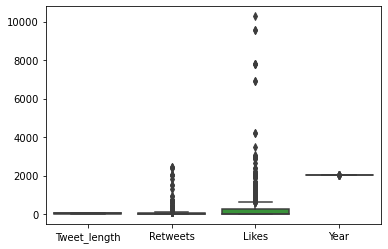

In [20]:
# Plot boxplots for numerical column to check for outliers
sns.boxplot(data=tweets[['Tweet_length', 'Retweets', 'Likes', 'Year']])
plt.show()


- Tweet_length: Data is concentrated near the lower end with a small range and no outliers.

- Retweets: Larger data spread with some outliers indicating a few tweets received significantly more retweets.

- Likes: Wide data range with many outliers; some tweets received up to nearly 10,000 likes.

- Year: Narrow data range, indicating minimal variation around a specific year with no outliers.

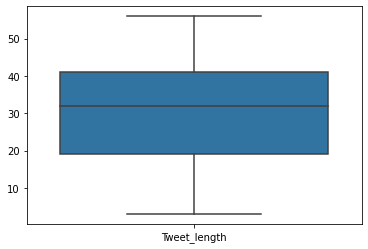

In [21]:
# Checking for outliers in the tweets dataset
# Compute word count for questions and tweets
data['Question_length'] = data['Question'].apply(lambda x: len(x.split()))
tweets['Tweet_length'] = tweets['Text'].apply(lambda x: len(x.split()))

# Boxplot of text lengths
sns.boxplot(data=tweets[['Tweet_length']])
plt.show()

There are no outliers in the tweets dataset

### Consistency and Uniformity-name capitalization, uniqueness